# Udacity - Introduction to Machine Learning Course
## Submitted by Abhijith Ganesh

### Recommended approach
Use torchvision to classify hand written characters and identify them! Classic MNIST

In [2]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from torchvision.datasets import MNIST
import pandas as pd
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models import vgg19
import torch
import random

batch_size = 16

### Addition of data and loaders
<hr/>

Change the download boolean to download. You can set the path according to your setup!

```python
image_dataset = MNIST(root=f'{YOUR_PATH_NAME}', train=True, download=True)
```

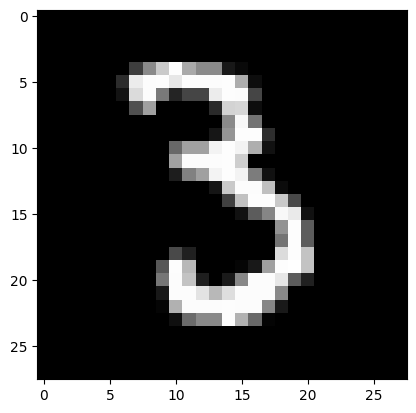

In [36]:
im_show_transformer = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),    
    transforms.ToTensor(),
    transforms.Resize((28,28))
])
image_dataset = MNIST(root='./data', train=True, download=False, transform=im_show_transformer)
split = 0.8

train_len = int(len(image_dataset)*split)
test_len  = len(image_dataset) - train_len
train_set, test_set = random_split(image_dataset, [train_len, test_len])

plt.imshow(train_set.dataset.data[random.randrange(1, len(train_set))], cmap='gray')

In [33]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

750

## Why grayscaling ?

- I've grayscalled the image to read better, colours are kinda pointless.

The test and train split has been done using the random_split function from PyTorch. The split is __80-20.__


In [5]:
model = vgg19(pretrained=True)

/home/abhijithganesh/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/abhijithganesh/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/abhijithganesh/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
3.0%


KeyboardInterrupt: 